## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, tree
from sklearn.tree import DecisionTreeRegressor, export_text
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image

# Conforme sugestão da colega Sandra Sandra Lin Teixeira da Costa em Mar 20 15:08

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [26]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [27]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

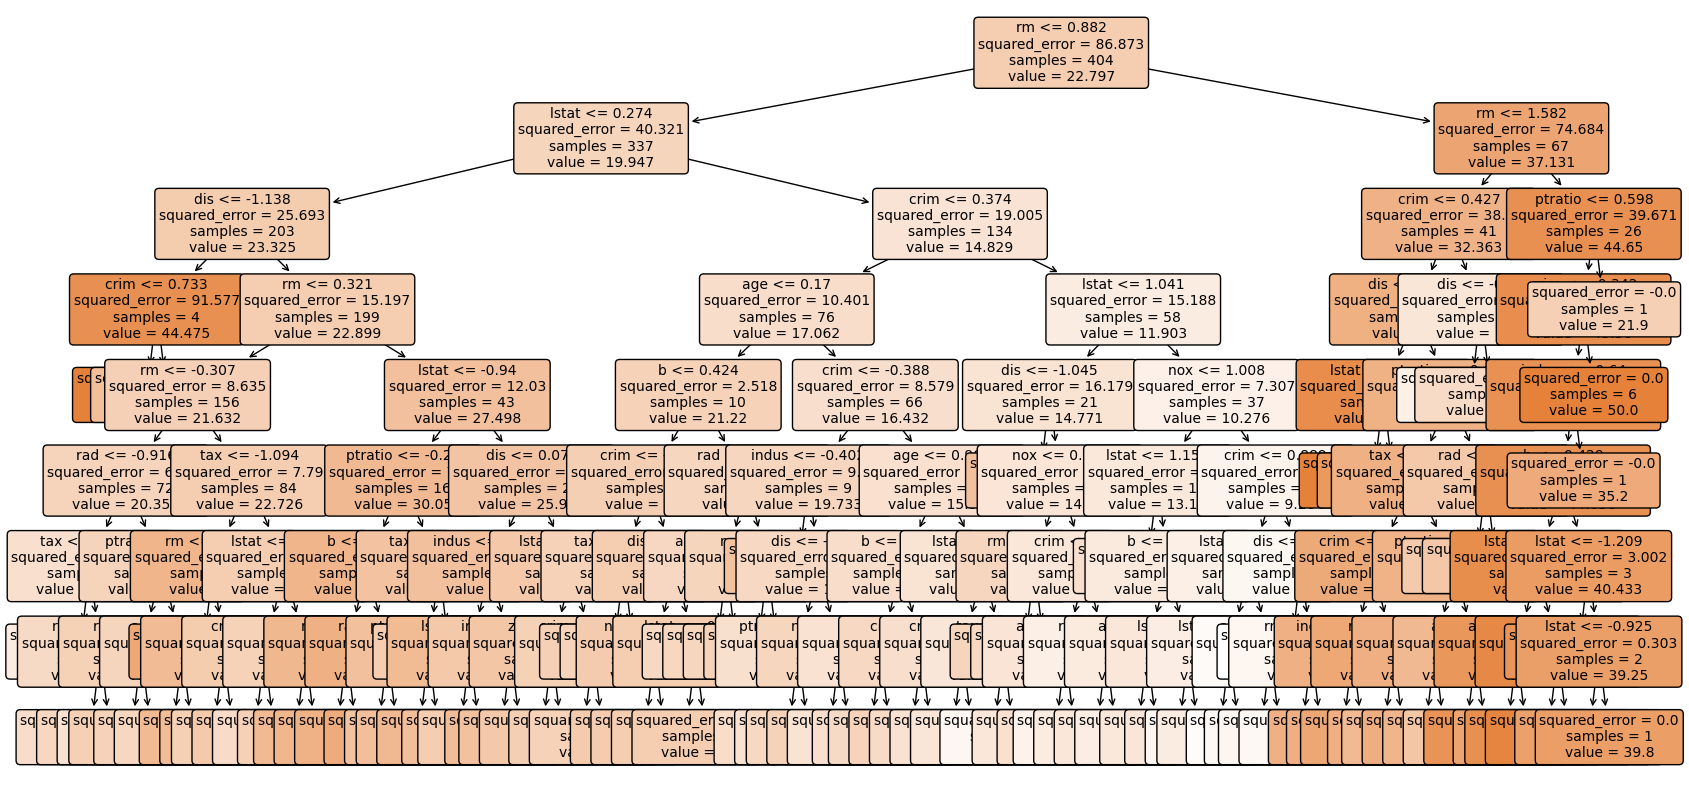

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Inicializando e treinando a árvore de regressão
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor.fit(X_train, y_train)

# Visualizando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, filled=True, feature_names=list(X.columns), rounded=True, fontsize=10)
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
# Convertendo X_train para DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Selecionando uma amostra da base de treinamento
amostra_exemplo = X_train_df.iloc[[0]]

# Obtendo o caminho na árvore para a amostra
caminho_na_arvore = tree_regressor.decision_path(amostra_exemplo)

# Imprimindo o caminho
print("Caminho indicado pelos CCP-alfas:")
print(caminho_na_arvore.toarray())

Caminho indicado pelos CCP-alfas:
[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
# Obtendo a trajetória de custo-complexidade
ccp_path = tree_regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurezas = ccp_path['ccp_alphas'], ccp_path['impurities']

# Inicializando uma lista para armazenar as árvores treinadas
arvores_treinadas = []

# Treinando uma árvore para cada valor de alfa
for alpha in ccp_alphas:
    # Inicialize e treine a árvore com o valor específico de alfa
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train, y_train)
    
    # Adicione a árvore à lista
    arvores_treinadas.append(tree)


### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [15]:
# Inicializando uma lista para armazenar os MSEs
mse_por_arvore = []

# Calculando o MSE para cada árvore na lista
for tree in arvores_treinadas:
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_por_arvore.append(mse)


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

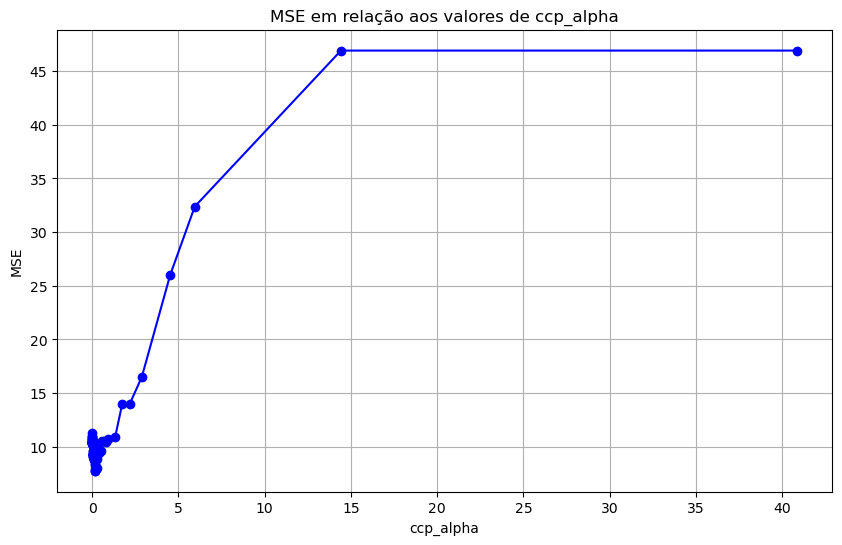

In [31]:
# Montando o gráfico do MSE pelo alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_por_arvore, marker='o', linestyle='-', color='b')
plt.title('MSE em relação aos valores de ccp_alpha')
plt.xlabel('ccp_alpha')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


In [28]:
# Encontrando o índice do valor mínimo de MSE
indice_min_mse = np.argmin(mse_por_arvore)

# Valor de ccp_alpha correspondente ao mínimo MSE
ccp_alpha_escolhido = ccp_alphas[indice_min_mse]

# Imprima o resultado
print(f"ccp_alpha escolhido: {ccp_alpha_escolhido}")

ccp_alpha escolhido: 0.17329304180417732


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [29]:
alpha_escolhido = 0.17

# Inicializando e treinando a árvore com o valor específico de alpha_escolhido
arvore_final = DecisionTreeRegressor(ccp_alpha=alpha_escolhido, random_state=42)
arvore_final.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_final = arvore_final.predict(X_test)

# Calculo do R-quadrado
r2_final = r2_score(y_test, y_pred_final)

# Resultado
print(f"R-quadrado para a árvore final: {r2_final}")

R-quadrado para a árvore final: 0.8862076600455877


### 7. Visualize esta árvore.

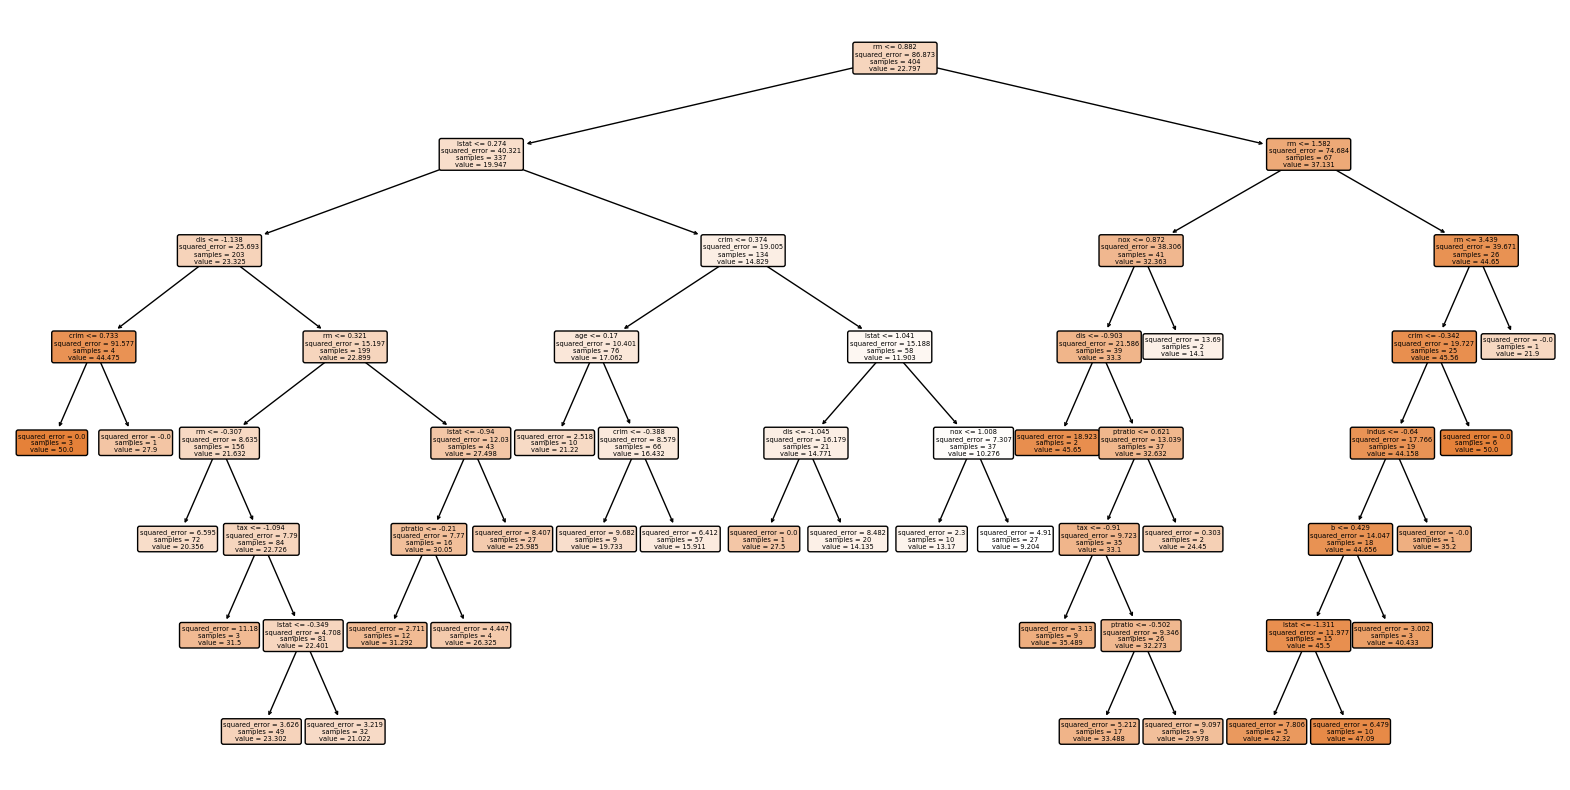

In [30]:
# Visualizando a árvore 
plt.figure(figsize=(20, 10))
plot_tree(arvore_final, filled=True, feature_names=list(X.columns), rounded=True)
plt.show()